# Simulating and studying an AR process

In [10]:
import numpy as np
from pandas import DataFrame as df
import importlib
import autoregressive as ar

In [11]:
importlib.reload(ar) # if autoregressive.py is modified 

<module 'autoregressive' from 'c:\\Users\\alber\\python_projects\\fundamentals_of_interest_rates\\autoregressive.py'>

In [12]:
model = ar.AutoRegressive(steps=1000, paths=9, a=np.array([0.2, 0.2, 0.1]), start=0, dist='normal')
data = model.generate()

100%|██████████| 998/998 [00:00<00:00, 150404.78it/s]

9 different AR(2) processes of 1000 steps have been generated with increments following normal distribution


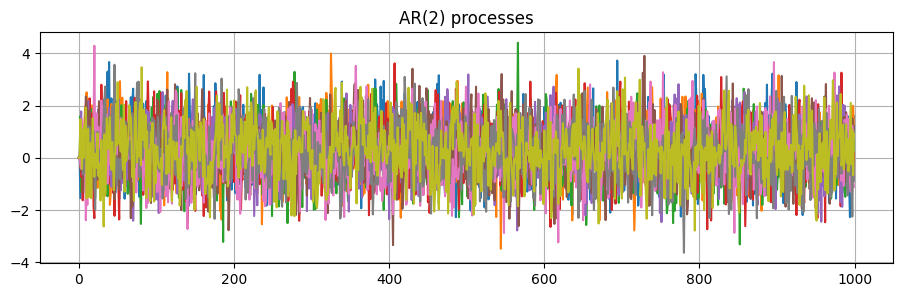

In [13]:
model.plot_paths()

In [14]:
coefficients = model.fit_ar()
df(coefficients).head()

,0,1,2,3,4,5,6,7,8
0,0.231913,0.254704,0.184340,0.227376,0.223359,0.199365,0.110585,0.162953,0.192397
1,0.233681,0.207153,0.153771,0.217290,0.218996,0.183535,0.199168,0.194954,0.222919
2,0.073141,0.074989,0.138082,0.069473,0.086537,0.119080,0.167295,0.152985,0.134074


In [15]:
comparison = np.vstack([model.coefficients.mean(axis=1), model.a])
df(comparison.T).rename(columns={0: 'Average estimated coefficients', 1: 'Real coefficients'})

,Average estimated coefficients,Real coefficients
0,0.198555,0.2
1,0.203496,0.2
2,0.112851,0.1


100%|██████████| 998/998 [00:00<00:00, 199528.83it/s]




RESIDUALS DIAGNISTIC




DESCRIPTIVE STATISTICS


,0,1,2,3,4,5,6,7,8
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.000432,-0.000855,0.000085,0.000415,0.000800,-0.000493,0.000989,0.000692,-0.000014
std,1.000500,1.000500,1.000500,1.000500,1.000500,1.000500,1.000500,1.000500,1.000500
min,-2.448702,-3.877591,-3.468504,-2.901892,-3.090939,-3.442302,-3.268707,-3.835672,-2.930269
25%,-0.717610,-0.714584,-0.674708,-0.671051,-0.705396,-0.663304,-0.698523,-0.640767,-0.639294
50%,-0.068761,0.000161,0.001238,0.003446,-0.012994,-0.000775,-0.037467,-0.008275,0.001870
75%,0.669593,0.669793,0.681966,0.676617,0.718377,0.641304,0.675035,0.701332,0.653500
max,3.187894,3.682290,4.028108,3.137702,2.864294,3.438539,3.952836,3.275693,3.013750




MOMENTS SUMMARY


,0,1,2,3,4,5,6,7,8
mean,-0.000432,-0.000855,0.000085,0.000415,0.000800,-0.000493,0.000989,0.000692,-0.000014
variance,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
skewness,0.230287,0.004164,-0.062352,-0.038399,-0.053731,0.000133,0.132575,-0.022264,-0.017558
kurtosis,2.839645,3.111239,3.042686,2.890680,2.732654,3.023876,3.165073,3.112530,2.995257




JARQUE–BERA NORMALITY TEST RESULTS


,0,1,2,3,4,5,6,7,8
jb stat,9.910053,0.518479,0.723871,0.743696,3.459261,0.023756,4.064729,0.610234,0.052317
p value,0.007048,0.771638,0.696327,0.689459,0.177350,0.988192,0.131025,0.737037,0.974180




AUTOCORRELATION FUNCTION (ACF)


,0,1,2,3,4,5,6,7,8
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.094689,0.093925,0.163507,0.088510,0.110588,0.145383,0.208284,0.189756,0.173060
2,0.239601,0.213336,0.176129,0.222691,0.228394,0.200279,0.233322,0.223696,0.246340
3,0.018333,0.005130,0.067315,0.023709,0.102411,0.009702,0.096160,0.054051,0.106230
4,0.073264,0.054330,0.031095,0.058466,0.045844,0.034946,0.043062,0.064074,0.064431
5,-0.013512,-0.011240,-0.023129,-0.034193,-0.003265,0.007544,-0.000643,0.005375,0.016550
6,-0.002753,0.105085,-0.033727,0.019899,0.085362,-0.008303,-0.010507,0.003885,0.036719
7,-0.025066,0.013334,0.030609,-0.088528,-0.003321,-0.003541,0.022884,-0.076013,0.003759
8,-0.048656,0.060388,0.033515,-0.076083,0.040412,-0.050019,-0.015123,-0.004618,0.033625
9,0.002089,0.006803,-0.004788,-0.039921,0.013520,-0.020112,-0.018013,0.046554,-0.007649


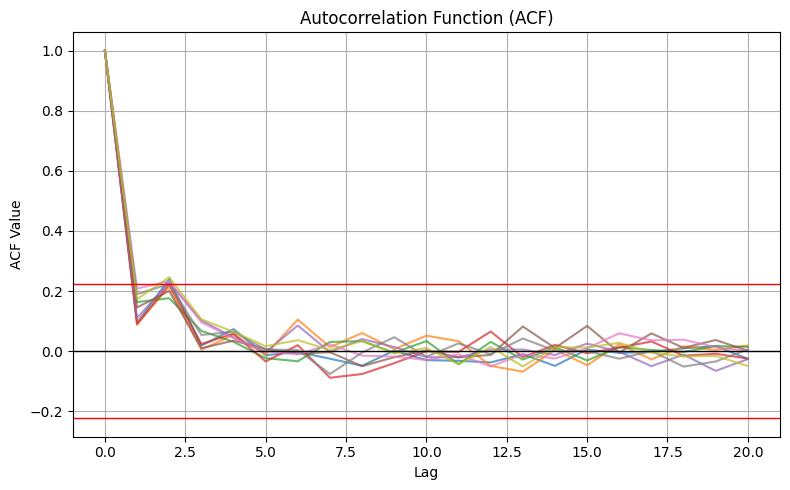



QQ Plots


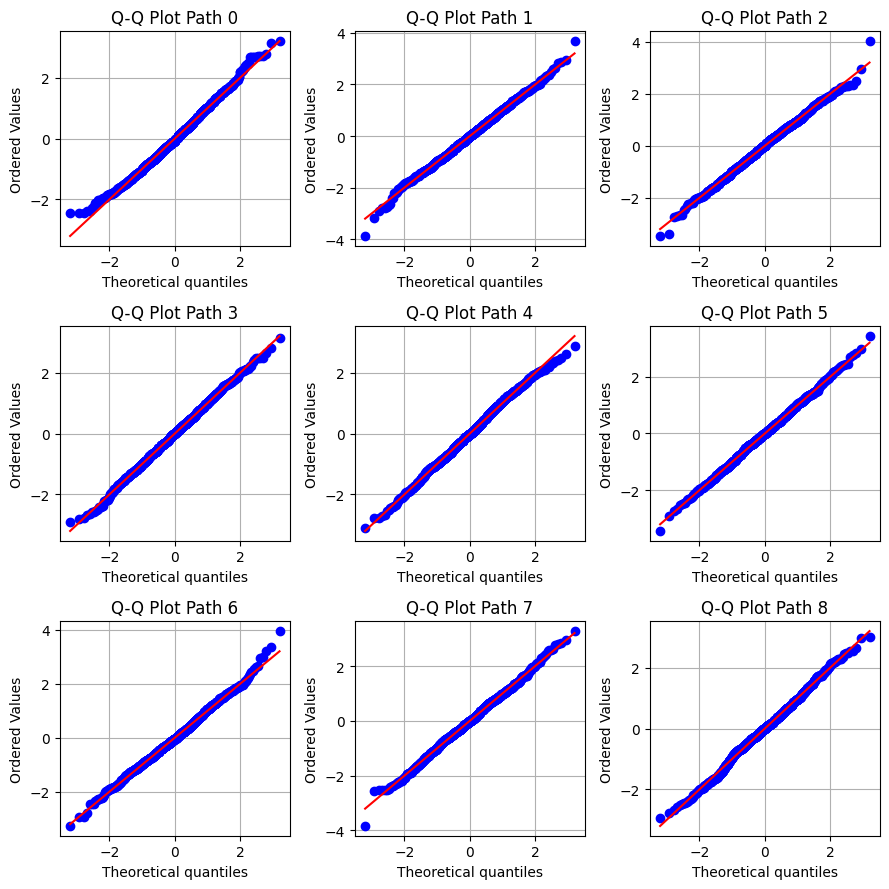

In [16]:
eps, eta = model.get_residuals()
model.study_residuals()